In [138]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
tf.__version__

'2.17.1'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [139]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [140]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [145]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [146]:
model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8852 - loss: 0.3545 - val_accuracy: 0.9846 - val_loss: 0.0508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.9872 - val_loss: 0.0374
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9880 - val_loss: 0.0363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 33ms/step - accuracy: 0.9911 - loss: 0.0267 - val_accuracy: 0.9910 - val_loss: 0.0291
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9902 - val_loss: 0.0338


In [183]:
y_true=test_labels
y_pred=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [148]:
classes=[0,1,2,3,4,5,6,7,8,9]

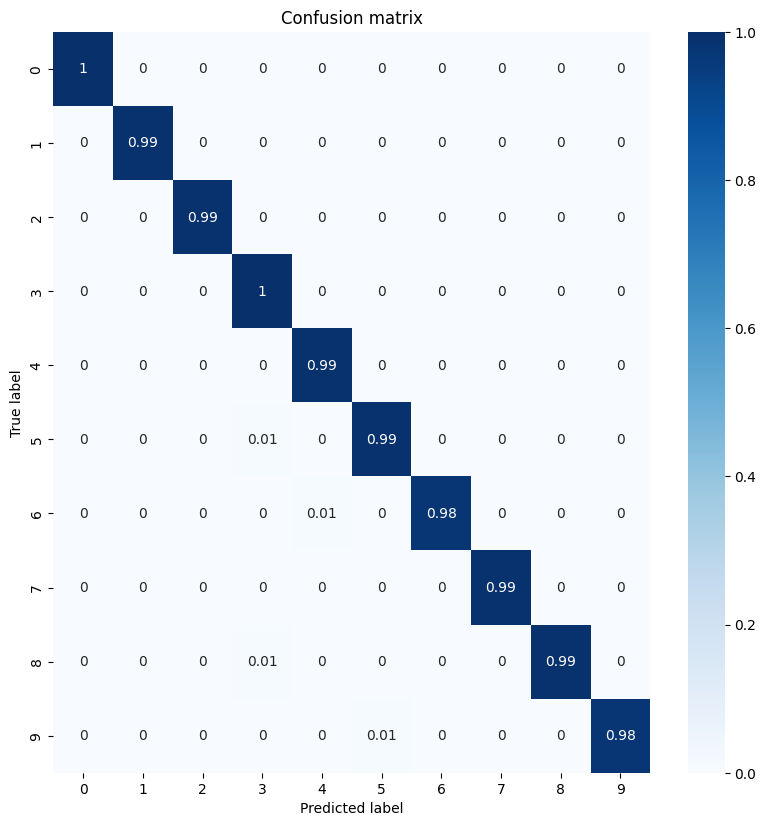

In [184]:
con_mat=tf.math.confusion_matrix(labels=y_true, predictions=y_pred.argmax(axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Cálculo das métricas da avaliação do modelo

In [270]:
y_true=test_labels
y_pred=model.predict(test_images)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [271]:
classes=[0,1,2,3,4,5,6,7,8,9]

In [272]:
"""
VP: Verdadeiros Positivos
VN: Verdadeiros Negativos
FP: Falsos Positivos
FN: Falsos Negativos
"""

VP = 0
FP = 0
FN = 0
VN = 0

for val_true, val_pred in zip(y_true, y_pred):
  if val_true == classes[np.argmax(val_pred)] and val_pred[np.argmax(val_pred)] >= 0.9:
    VP += 1

  elif val_true != classes[np.argmax(val_pred)] and val_pred[np.argmax(val_pred)] >= 0.9:
    VN += 1

  elif val_true == classes[np.argmax(val_pred)] and val_pred[np.argmax(val_pred)] <= 0.9:
    FP += 1

  elif val_true != classes[np.argmax(val_pred)] and val_pred[np.argmax(val_pred)] <= 0.9:
    FN += 1


In [273]:
# Acurácia
total_itens = VP + VN + FP + FN
acuracia = (VP + VN) / total_itens

# Sensibilidade (Recall)
sensibilidade = VP / (VP + FN)

# Especificidade
especificidade = VN / (VN + FP)

# Precisão
precisao = VP / (VP + FP)

# F-Score
if (precisao + sensibilidade) != 0:
    f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
else:
    f_score = 0

In [188]:
acuracia

0.9768

In [155]:
sensibilidade

0.9936695936287523

In [156]:
especificidade

0.17475728155339806

In [157]:
precisao

0.9828317511613816

In [158]:
f_score

0.988220958570268

In [359]:
# Converte y_pred para valores discretos de apenas uma dimensão para a curva ROC
y_pred_prob = np.argmax(y_pred, axis=1)

In [360]:
y_true_prob = []
for t, p in zip(y_true, y_pred):
  if t == np.argmax(p):
    y_true_prob.append(1)
  else:
    y_true_prob.append(0)

y_true_prob = np.array(y_true_prob)

In [365]:
# Calculo ROC curve
fpr, tpr, thresholds = roc_curve(y_true_prob, y_pred_prob)

# Calculo AUC para as classes
roc_auc = auc(fpr, tpr)


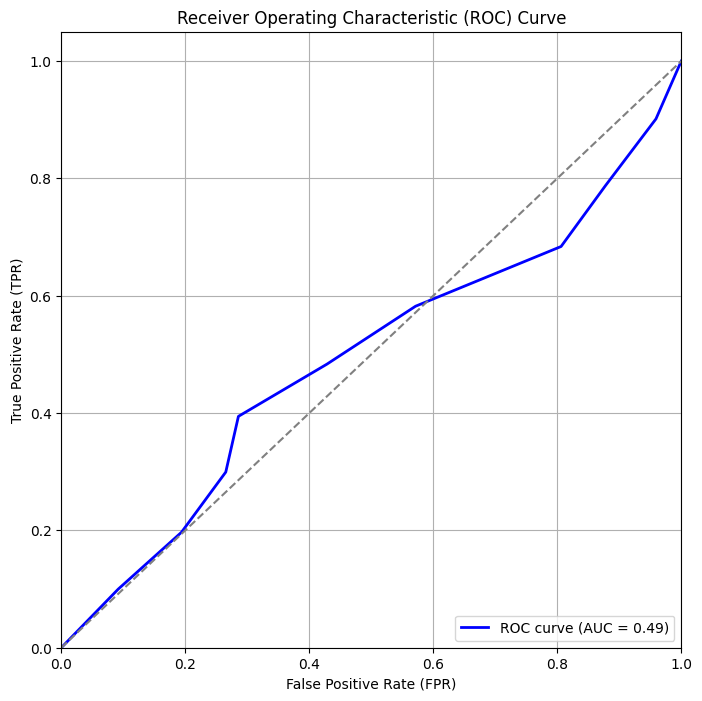

In [364]:
# Plotar a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal (chance aleatória)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
